# Tasca M8 T01

### **Exercicis d'algoritmes d'Agrupació.**

## - Exercici 1
**Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.**
## 1.1. Neteja base de dades
Primer de tot, procedeixo a obrir, convertir en dataframe, descriure i netejar la base de dades que utilitzaré en aquesta tasca:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Publicacions Facebook Thailandia.csv')

df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


Si mirem el dataframe, la columna status_id es tracta d'una etiqueta per a cada registre lo qual no es interesant mantenir ja que no aporta res per al anàlisi. Ni tampoc la columna status_published.
Si mirem les últimes columnes (Column1, 2, 3, i 4) no tenen informació, son totes NaN.

In [2]:
df.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [3]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Comprovo que tots els valors de les columnes son nuls.

In [4]:
df.duplicated().sum()

51

He detectat 51 duplicats. 

Ara, amb tota aquesta informació procedeixo a eliminar tots aquests valors nuls, columnes inecessaries i els duplicats:

In [5]:
# Elimino columnes innecessaries i duplicats
df = df.drop(["status_id", "status_published", "Column1", "Column2", "Column3", "Column4"], axis=1)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [6]:
unique_status_types = df['status_type'].unique()
print(unique_status_types)

['video' 'photo' 'link' 'status']


In [7]:
df.isna().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

Un cop netejat el dataframe procedeixo a la matriu de correlació:

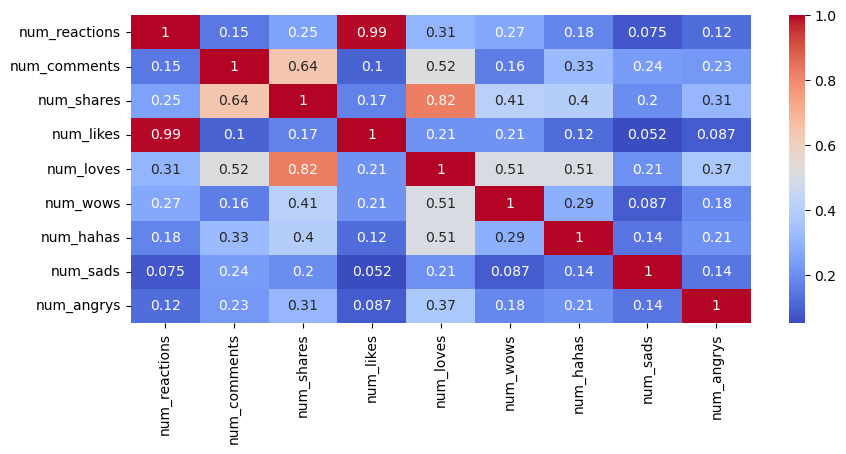

In [8]:
correlacio = df.corr(numeric_only=True) 
plt.figure(figsize=(10,4))
sns.heatmap(correlacio, cmap='coolwarm', annot=True)
plt.show()

Si analitzem el mapa de calor de la matriu de correlació, observem que:
- El nombre de likes presenta una correlació molt elevada amb el nombre de reaccions amb un valor de 0.99, atès que la majoria d'aquestes acostumen a ser likes.
- No s'observa cap correlació negativa entre les variables.
- El nombre de loves mostra una correlació positiva destacada amb el nombre de shares, amb un valor elevat de 0.82.
- El nombre de shares té una correlació positiva del 0.64 amb el nombre de comentaris.
- La resta de variables presenten una correlació molt baixa

Concluim que casi tothom (0.99) reacciona amb un like una publicació. També veiem que com més loves tingui una publicació aquesta es comparteix més i/o viceversa. Com més compartida es una publicació més comentaris té.

Curiós veure que si una publicació té molts likes i moltes reaccions no te molta tendencia a ser compartida, mentre que si aquesta publicació té molts 'loves' aleshores té una tendencia molt alta a ser compartida.

## 1.2. Scaling

El procés de PCA identifica les direccions amb més variància. Com que la variància d'una variable es mesura en les mateixes unitats elevades al quadrat, si abans de calcular les components no s'estandarditzen totes les variables perquè tinguin mitja zero i desviació estàndard d'un, aquelles variables l'escala de les quals sigui més gran dominaran la resta. 

Per això, faré una estandardització de les variables per ajustar totes les variables de manera que tinguin la mateixa escala i rellevància en el nostre model.

Entre d'altres, hi ha tres eines generals per estandaritzar dades:
- **StandardScaler**: Si les variables segueixen una distribució normal.
- **MinMaxScaler**: Variables que no segueixen una distribució normal però que no tenen outliers. 
- **RobustScaler**: Variables que no segueixen una distribució normal i que tenen valors atipics (outliers). 

Per saber quines utilitzaré, abans estudio el comportament de les variables:

In [9]:
from scipy import stats
import pandas as pd
import numpy as np

#creo un nou dataframe per només escalar les columnes numeriques i no les categoriques com status_type (s'afegirà després de l'escalat)
df1 = df.select_dtypes(include=[np.number])

for data in df1.columns:
    shapiro_test = stats.shapiro(df1[data])
    print("La variable", data, "te un p-valor de", "{:.3f}".format(shapiro_test.pvalue))
    if shapiro_test.pvalue > 0.05:
        print("La variable", data, "probablement té una distribució normal.\n")
    else:
        print("La variable", data, "probablement NO té una distribució normal.\n")


La variable num_reactions te un p-valor de 0.000
La variable num_reactions probablement NO té una distribució normal.

La variable num_comments te un p-valor de 0.000
La variable num_comments probablement NO té una distribució normal.

La variable num_shares te un p-valor de 0.000
La variable num_shares probablement NO té una distribució normal.

La variable num_likes te un p-valor de 0.000
La variable num_likes probablement NO té una distribució normal.

La variable num_loves te un p-valor de 0.000
La variable num_loves probablement NO té una distribució normal.

La variable num_wows te un p-valor de 0.000
La variable num_wows probablement NO té una distribució normal.

La variable num_hahas te un p-valor de 0.000
La variable num_hahas probablement NO té una distribució normal.

La variable num_sads te un p-valor de 0.000
La variable num_sads probablement NO té una distribució normal.

La variable num_angrys te un p-valor de 0.000
La variable num_angrys probablement NO té una distribu

C:\Users\julia\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Com que cap les variables no segueix una distribució normal, descarto aplicar el StandardScaler. A continuació, miro quines variables tenen outliers i quines no:

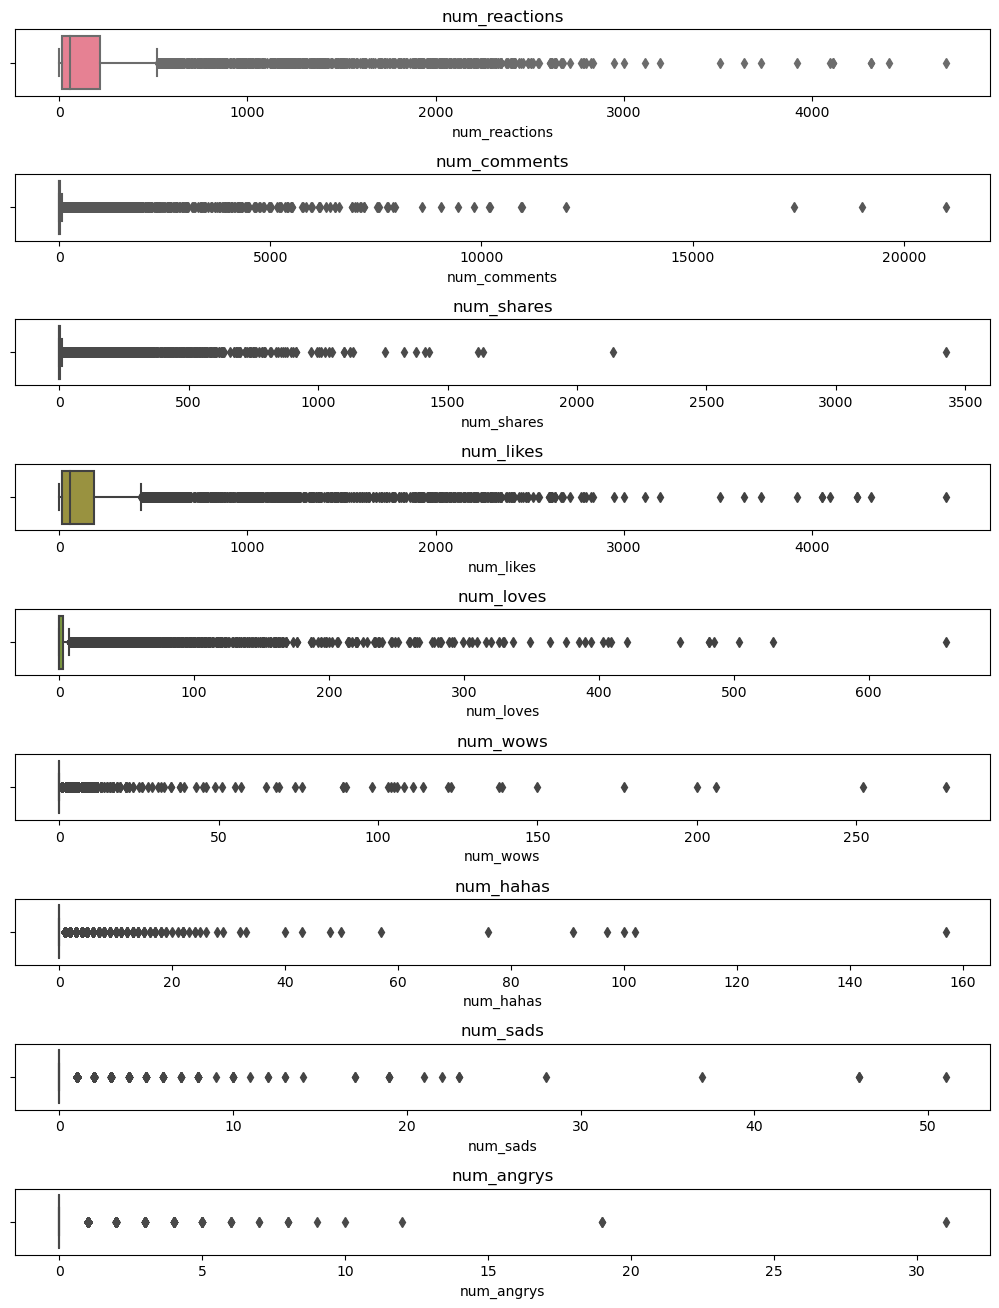

In [10]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(df1.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=df1[column], orient="h",color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

Si mirem el comportament de les variables, comprovem que totes tenen outliers, per tant aplicaré el RobustScaler:

In [11]:
# faig una copia del dataframe original
df2 = df1.copy()

In [12]:
from sklearn.preprocessing import RobustScaler

# Creo una instancia de RobustScaler
RS = RobustScaler()

# Selecciono totes les columnes de df2 y aplico el Robust Scaler
df2_scaled = pd.DataFrame(RS.fit_transform(df2), columns=df2.columns)

df2_scaled

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0
1,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0
2,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0
3,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0
4,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7045,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0
7046,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0
7047,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0
7048,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0


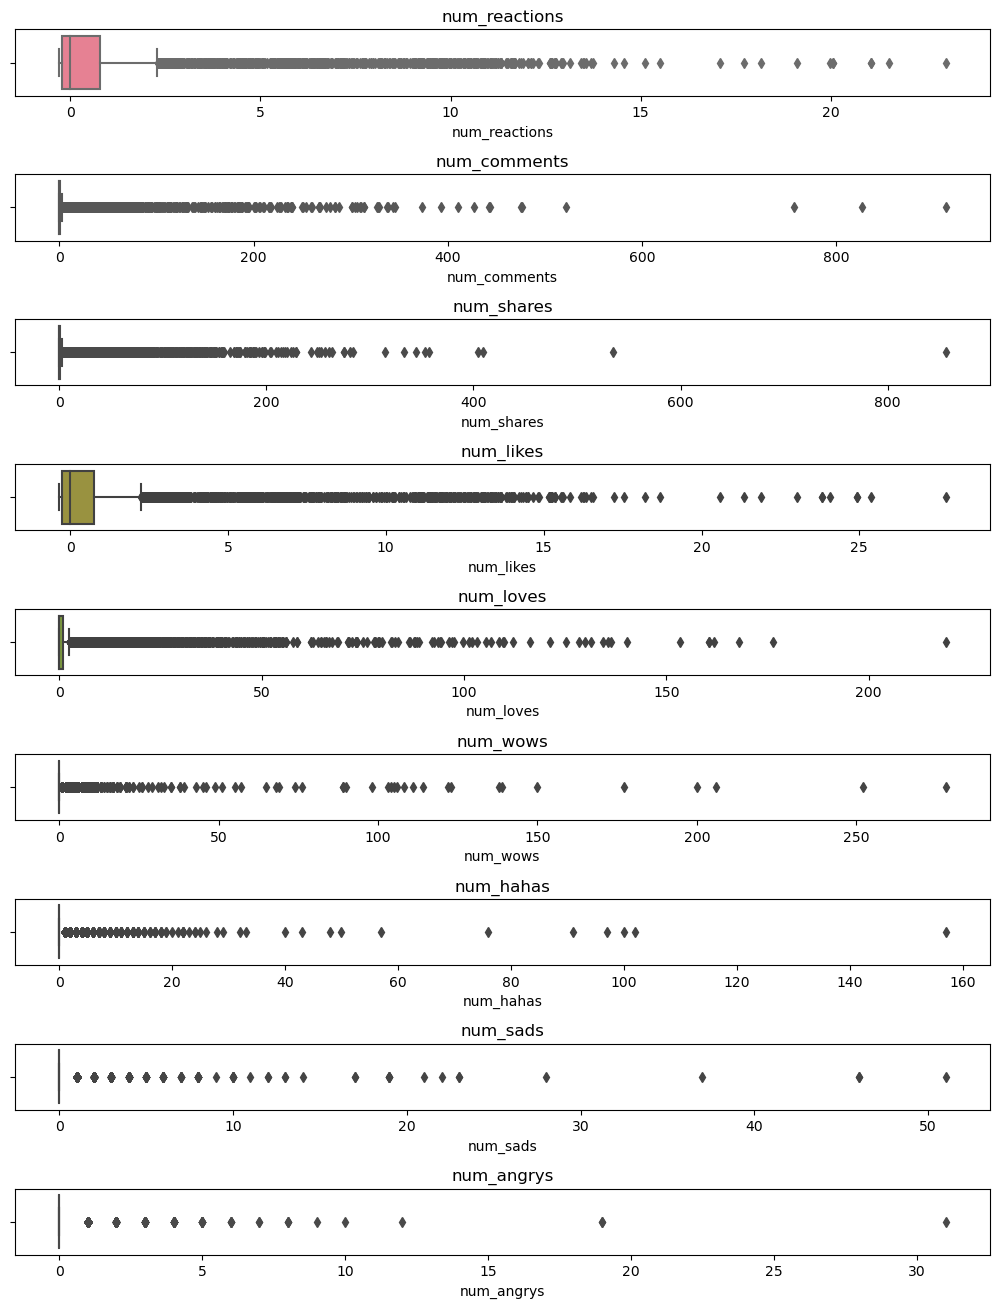

In [13]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(df2_scaled.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=df2_scaled[column], orient="h",color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

Es pot comprovar que les variables ja estan escalades perque els valors de l'eix x s'han reduït.

## 1.3. PCA

**PCA (Anàlisi de Components Principals):**

- PCA és una tècnica de reducció de dimensionalitat que s'utilitza per transformar un conjunt de dades de moltes dimensions en un conjunt de dades de menys dimensions, conservant al mateix temps la major quantitat possible de la variància original.
- En resum, PCA identifica les direccions (components principals) al llarg de les quals les dades tenen més variabilitat i projecta les dades en aquestes direccions principals.

**K-means:**

- K-means és un algoritme de clustering que agrupa les dades en k grups (clusters) basant-se en la similitud entre les observacions.
- L'algoritme K-means assigna cada observació al cluster del qual el centroid (punt central) és el més proper a aquesta observació. Els centroids s'ajusten iterativament per minimitzar la suma de les distàncies quadrades entre les observacions i els seus centroids assignats.

**Com s'utilitzen?**
A vegades, PCA s'utilitza abans d'aplicar K-means per reduir la dimensionalitat del conjunt de dades. Reduir la dimensionalitat pot fer que el K-means sigui més eficient i menys sensible a la maledicció de la dimensionalitat.

- El PCA pot ajudar a eliminar la multicolinealitat i reduir la redundància al conjunt de dades, la qual cosa pot ser beneficiosa per al rendiment de K-means.

- PCA és útil com a etapa de preprocessament per reduir la complexitat computacional i millorar la interpretabilitat del clustering, especialment en conjunts de dades de alta dimensionalitat.

En resum, PCA i K-means són eines diferents, però el seu ús conjunt sovint resulta beneficiós, especialment quan es treballa amb dades de alta dimensionalitat i es busca millorar l'eficiència i la interpretabilitat del clustering.

Per tant, com que tenim moltes dimensions, aprofitarem el PCA per reduir la dimensionalitat del dataset. Establiré un umbral del 95% de la variança.

In [14]:
from sklearn.decomposition import PCA

# Creo una instancia de PCA
pca = PCA()

# Ajusto el PCA al dataset escalat
pca.fit(df2_scaled)

# Obtenir el numero de components principals seleccionats
pca.n_components_

9

### Número òptim de components principals

Essent l'objectiu del PCA reduir-ne la dimensionalitat de la matriu de dades, és d'interès utilitzar el nombre mínim de components que resulten suficients per explicar les dades. No hi ha una resposta o mètode únic que permeti identificar quin és el nombre òptim de components principals a utilitzar. Una manera de procedir molt estesa consisteix a avaluar la proporció de variància explicada acumulada i seleccionar el nombre de components mínim a partir del qual l'increment deixa de ser substancial.

*El sumatori de la proporció de variància explicada acumulada de tots els components és sempre 1.*

Procedeixo a fer un estudi de la variança acumulada respecte al numero de components:

Text(0.5, 1.0, 'Variança acumulada')

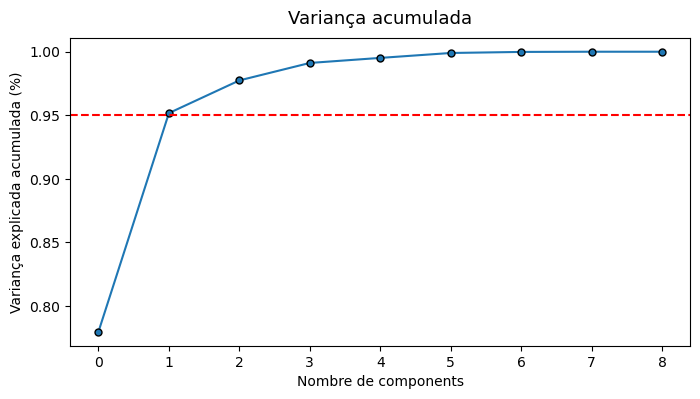

In [15]:
plt.figure(figsize = (8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o", markersize=5, markeredgecolor='black')
plt.axhline(0.95, color = "red", linestyle = "--")
plt.xlabel('Nombre de components')
plt.ylabel('Variança explicada acumulada (%)')
plt.title("Variança acumulada", fontsize=13, pad=10)

Si s'utilitzés únicament la primera component s'aconseguiria explicar el 95% de la variança observada.
Dada que utilitzarem per trobar un nou número òptim de components.

In [16]:
# Creo una nova instancia de PCA amb un 95% de variança explicada:
pca1 = PCA(.95)

# Ajustar el pca al dataset escalat
pca1.fit(df2_scaled)

# Obtenir el numero de components principals seleccionats
pca1.n_components_ 

2

El PCA ha determinat que només es necessiten 2 components principals per retindre el 95% de la variança del nostre dataset. Per tant, la majoria de la informació del nostre dataset original es pot representar de manera efectiva utilitzant només dos components principals.

Com hem vist abans, el dataset original té 9 variables. El fet que ara només necessitem 2 components principals per explicar el 95% de la variància suggereix que hi ha certa redundància o correlació entre les variables originals. El PCA ha trobat una nova base de dades (els dos components principals) en la qual la informació s'expressa de manera més eficient.

In [17]:
# Creo una instància de PCA amb 2 components principals
pca2 = PCA(n_components=2)

# Ajusto el PCA al dataset escalat
pca2.fit(df2_scaled)

# Transformo el dataset inicial i creo un nou DataFrame
df_pca = pd.DataFrame(pca2.transform(df2_scaled), columns=["PCA1", "PCA2"], index=df2_scaled.index)
df_pca

,PCA1,PCA2
0,49.098473,37.985068
1,-14.527011,-2.021293
2,3.545756,3.337543
3,-14.531109,-2.027630
4,-13.895270,-1.193752
...,...,...
7045,-14.533421,-2.031205
7046,-14.437477,-1.925455
7047,-14.473107,-1.954529
7048,-10.606645,1.677913


Fins ara he reduit el dataset inicial (previament estandaritzat amb robustscaler) de 9 components/variables a un dataset amb nomes 2 components principals (PCA1 i PCA2).

En resum, aquest procés de reducció de dimensionalitat amb PCA ha simplificat la representació de l'conjunt de dades original, mantenint al mateix temps una quantitat significativa d'informació.

El PCA de 2 dimensions ja esta fet. Ara concateno, la variable status_type eliminada abans de fer el scaling ja que es categorica, com a variable dummy.

In [18]:
dummies = pd.get_dummies(df["status_type"], prefix="status_type")

df_pca = pd.concat([df_pca, dummies], axis=1)
df_pca

,PCA1,PCA2,status_type_link,status_type_photo,status_type_status,status_type_video
0,49.098473,37.985068,0,0,0,1
1,-14.527011,-2.021293,0,1,0,0
2,3.545756,3.337543,0,0,0,1
3,-14.531109,-2.027630,0,1,0,0
4,-13.895270,-1.193752,0,1,0,0
...,...,...,...,...,...,...
7045,-14.533421,-2.031205,0,1,0,0
7046,-14.437477,-1.925455,0,1,0,0
7047,-14.473107,-1.954529,0,1,0,0
7048,-10.606645,1.677913,0,1,0,0


Faig el mateix al df escalat, perque també tingui la columna status_type com a variables dummy

In [19]:
df2_scaled = pd.concat([df2_scaled, dummies], axis=1)
df2_scaled

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,2.324257,22.086957,65.50,2.229508,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.448020,-0.173913,0.00,0.548435,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.829208,10.086957,14.25,0.870343,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.254950,-0.173913,0.00,0.315946,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.759901,-0.173913,0.00,0.870343,3.000000,0.0,0.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.146040,-0.173913,0.00,0.184799,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
7046,-0.215347,-0.173913,0.00,-0.262295,0.333333,0.0,1.0,0.0,0.0,0,1,0,0
7047,-0.284653,-0.173913,0.00,-0.339791,0.333333,0.0,0.0,0.0,0.0,0,1,0,0
7048,1.443069,0.347826,5.50,1.734724,0.666667,0.0,0.0,0.0,0.0,0,1,0,0


## 1.4. K-Means (Anàlisis de clúster no jeràrquic)

L'exercici ens demana: classifica els diferents registres utilitzant l'algorisme de K-means:

Com bé s'ha esmentat anteriorment, K-means és un algoritme de clustering que agrupa les dades en k grups (clusters) basant-se en la similitud entre les observacions. Per tant, pertany a la classe d'algoritmes d'aprenentatge no supervisat, ja que no se li dona una variable objectiu, sinó que ell mateix la calcula.  El que si que és necessari, és assignar a l'algoritme quants clústers volem formar. 

Com encara no sabem el nombre exacte, cal realitzar proves per determinar el nombre òptim de clústers en els quals dividirem les nostres dades.

Per estimar el nombre òptim de clústers (K) utilitzare el mètode del colze i després faré servir el K-means per agrupar els punts de dades en clústers.

El metode del colze, calcula la suma de les distàncies al quadrat entre els punts de dades i els seus centroids per a diferents valors de K (nombre de clústers) i representa aquests resultats en un gràfic. El "colze" al gràfic sol ser un punt on la corba es trenca o forma un angle agut. Aquest punt suggereix el nombre òptim de clústers, ja que indica l'equilibri entre la compacitat dels clústers i la separació entre ells.

C:\Users\julia\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\julia\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


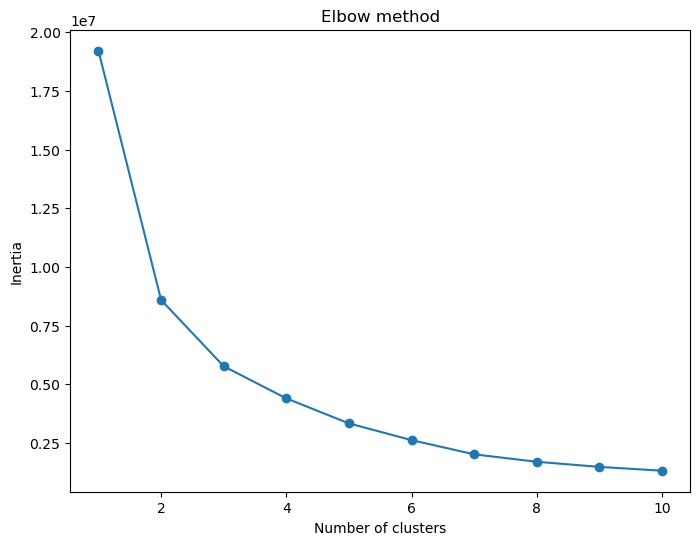

In [20]:
from sklearn.cluster import KMeans

inertias = []  

# Realitzem un loop de rang 1 fins a 10 per tal de determinar el numero de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) 
    kmeans.fit(df_pca) # Entrenem el model amb el nostre dataframe pca
    inertias.append(kmeans.inertia_) 
    
plt.figure(figsize = (8,6))  

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()  

En el gràfic, l'eix indica el nombre de clusters i l'eix y es la suma de les distàncies al quadrat o inertia. . Cada punt de la funció és el resultat de sumar les distàncies al quadrat de cada punt al clúster al qual pertanyen. Com més petit sigui el valor d'inertia millor. Tal com indica el nom del metode, es selecciona el punt en el qual la funció comença a descendre de forma lineal.  Podem veure que la inercia comença a reduirse de forma lineal a partir del cluster 3.

Per tal de trobar el nombre de clusters exacte aplicaré el metode de KneeLocator:

In [21]:
!pip install kneed

In [22]:
from kneed import KneeLocator

knee = KneeLocator(range(1, 11), inertias, curve='convex', direction='decreasing')

print("Nombre de clusters òptim:", knee.elbow)

Nombre de clusters òptim: 3


Per visualitzar-ho millor en el gràfic:

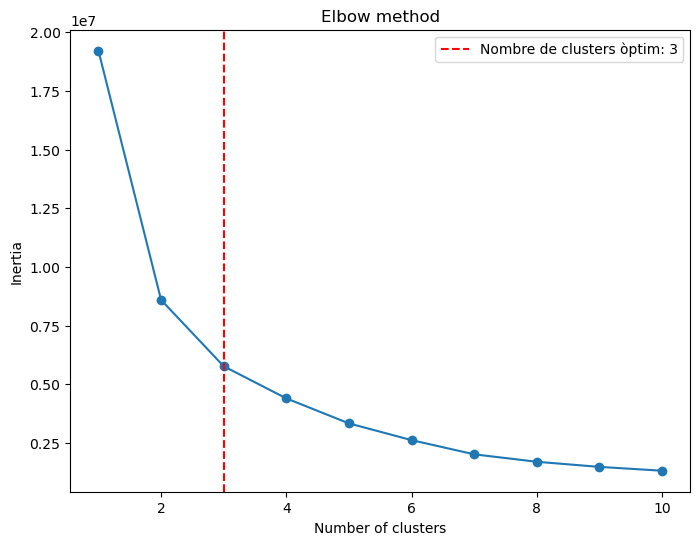

In [23]:
plt.figure(figsize = (8,6))  

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.axvline(x=3, color='red', linestyle='--', label=f'Nombre de clusters òptim: 3')
plt.legend()

plt.show()  

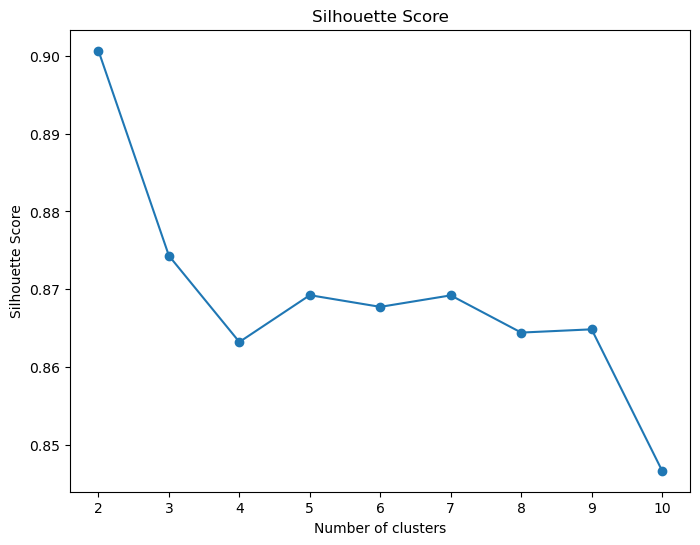

In [24]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []

# Realizamos un bucle en el rango de 2 a 10 para determinar el número de clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_pca)  # Entrenamos el modelo con nuestro dataframe pca
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca, labels)
    silhouette_scores.append(silhouette_avg)

# Representación gráfica del coeficiente de silueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [25]:
# Numero optim de clusters basat en el Silhouette Score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Sumar 2 perque el rang comença a 2
print(f"Nombre òptim de clusters: {optimal_k}")

Nombre òptim de clusters: 2


In [26]:
# Imprimeix el valor de Silhouette Score quan k=2
silhouette_score_k = silhouette_scores[0]  # L'index 0 correspon a k=2
print(f'Silhouette Score per k=2: {silhouette_score_k}')

Silhouette Score per k=2: 0.9006924873197568


Si fem el silhoutte score en el k-means ens diu que el nombre optim de clusters son 2. Tot i així, jo n'escolliré 3, seguint el elbow method.

Un cop tenim el nombre optim de clusters segons el elbow method, procedeixo a crear una nova instància de kmeans amb 3 clusters:

In [27]:
# Creo una instancia de Kmeans amb el numero de clusters òptim
kmeans = KMeans(n_clusters=3,n_init=10, random_state=42)

# Ajusto el Kmeans al nostre model
kmeans = kmeans.fit(df_pca)

Mitjançant el mètode predict(), predim a quin clúster pertany cada punt de dades dins del nostre dataset assignant-lo al seu centroid corresponent:

In [28]:
# Predicció de les etiquetes de clúster
cluster_labels = kmeans.predict(df_pca)

Un cop he ajustat el kmeans al nostre model df_pca i li he assignat les etiquetes de clúster, utilitzaré el metode cluster_centers_ per obtenir les coordenades dels centroids del model.

In [29]:
# Obtenir les coordenades dels centroides
centroides = kmeans.cluster_centers_

In [30]:
# Afegim una columna als dos dataframes amb les etiquetes dels clusters predides.

df2_scaled['cluster_labels'] = cluster_labels
df_pca['cluster_labels'] = cluster_labels
df_pca

,PCA1,PCA2,status_type_link,status_type_photo,status_type_status,status_type_video,cluster_labels
0,49.098473,37.985068,0,0,0,1,1
1,-14.527011,-2.021293,0,1,0,0,0
2,3.545756,3.337543,0,0,0,1,0
3,-14.531109,-2.027630,0,1,0,0,0
4,-13.895270,-1.193752,0,1,0,0,0
...,...,...,...,...,...,...,...
7045,-14.533421,-2.031205,0,1,0,0,0
7046,-14.437477,-1.925455,0,1,0,0,0
7047,-14.473107,-1.954529,0,1,0,0,0
7048,-10.606645,1.677913,0,1,0,0,0


Faig dues representacions grafiques dels clusters perque m'interesa tenir-les de totes dues llibreries (matplotlib i seaborn).

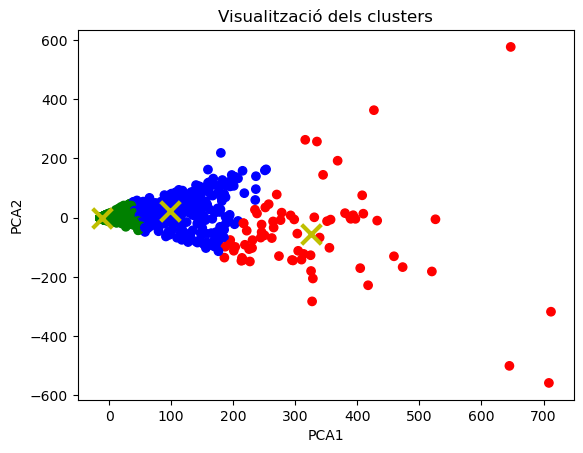

In [31]:
from matplotlib.colors import ListedColormap

cmap_colors = ListedColormap(['green', 'blue', 'red'])

plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster_labels'], cmap=cmap_colors)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=200, linewidths=3, color='y')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualització dels clusters')
plt.show()

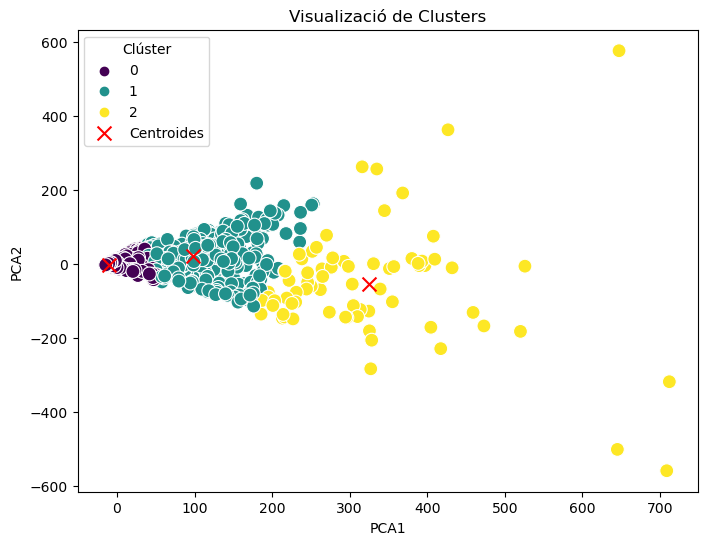

In [32]:
# Visualizació dels clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], data=df_pca, hue=cluster_labels, palette='viridis', s=100)
plt.title('Visualizació de Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Visualizació dels centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=100, label='Centroides')
plt.legend(title='Clúster')
plt.show()

En les grafiques es poden observar els 3 clusters. Descriuré la ultima grafica:

Es tracta d'una representació bidimensional dels clusters  després d'aplicar un analisi de components principals (PCA).

Cada punt en el gràfic representa una observació o instància de les dades després de ser projectada en un espai bidimensional mitjançant l'Anàlisi de Components Principals (PCA). L'eix x està etiquetat com a 'PCA1' i l'eix y com a 'PCA2', que són els dos components principals resultants de la transformació PCA.

Els punts estan colorats segons les etiquetes dels clústers als quals pertanyen. Els clusters han estat assignats previament amb l'algoritme d'agrupació k-means basant-se en les característiques originals de les dades.

Si un punt està més a prop d'un altre punt al gràfic, significa que comparteixen semblances en termes de les components principals (PCA). Els centròides, marcats amb 'x' de color vermell, representen el centre de cada clúster i la seva posició en el gràfic indica la ubicació central d'aquest grup de dades.

El gràfic ofereix una representació visual de com les dades es distribueixen després de la reducció de dimensionalitat (PCA) i com es grupen en l'espai definit per les dues primeres components principals.

Es interesant veure que les dades del cluster 0 estan molt juntes i a mesura que avançem amb el cluster 1 i finalment el 2 es van dispersant cada cop més. El cluster 2 (color groc) te les dades molt dispersades en comparació en el 0.  

Procedeixo a analitzar el nombre de registres per cada cluster per investigar com estan distribuides les dades:

In [33]:
df_pca['cluster_labels'].value_counts()

0    6495
1     483
2      72
Name: cluster_labels, dtype: int64

La majoria de registres es troben en el cluster 0, i si mirem el grafic, els punts es troben molt junts indicant que aquests registres comparteixen moltes semblances. Mentre que si mirem  els altres clusters trobem menys registres i mes dispersió, indicant menys semblances.

In [34]:
df['cluster_labels'] = cluster_labels #Creo nova columa al dataset original no escalat
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_labels
0,video,529,512,262,432,92,3,1,1,0,1
1,photo,150,0,0,150,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0,0
7047,photo,2,0,0,1,1,0,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0,0


In [35]:
df.groupby('cluster_labels')[['num_reactions', 'num_comments', 'num_shares', 
                               'num_likes', 'num_loves', 'num_wows', 
                               'num_hahas', 'num_sads', 'num_angrys']].mean().round(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster_labels,,,,,,,,,
0,205.91,50.59,10.63,200.26,4.52,0.63,0.29,0.15,0.06
1,486.20,1593.37,337.14,367.13,103.67,8.73,4.92,1.04,0.71
2,696.17,6715.65,698.04,528.47,143.53,10.92,8.94,3.07,1.24


La taula superior mostra el valor mitjà de les mètriques (reactions, comments, shares, etc.) per a cada etiqueta de clúster. Cada fila a la taula representa un clúster diferent, i cada columna mostra el valor mitjà de la mètrica corresponent per a aquest clúster.

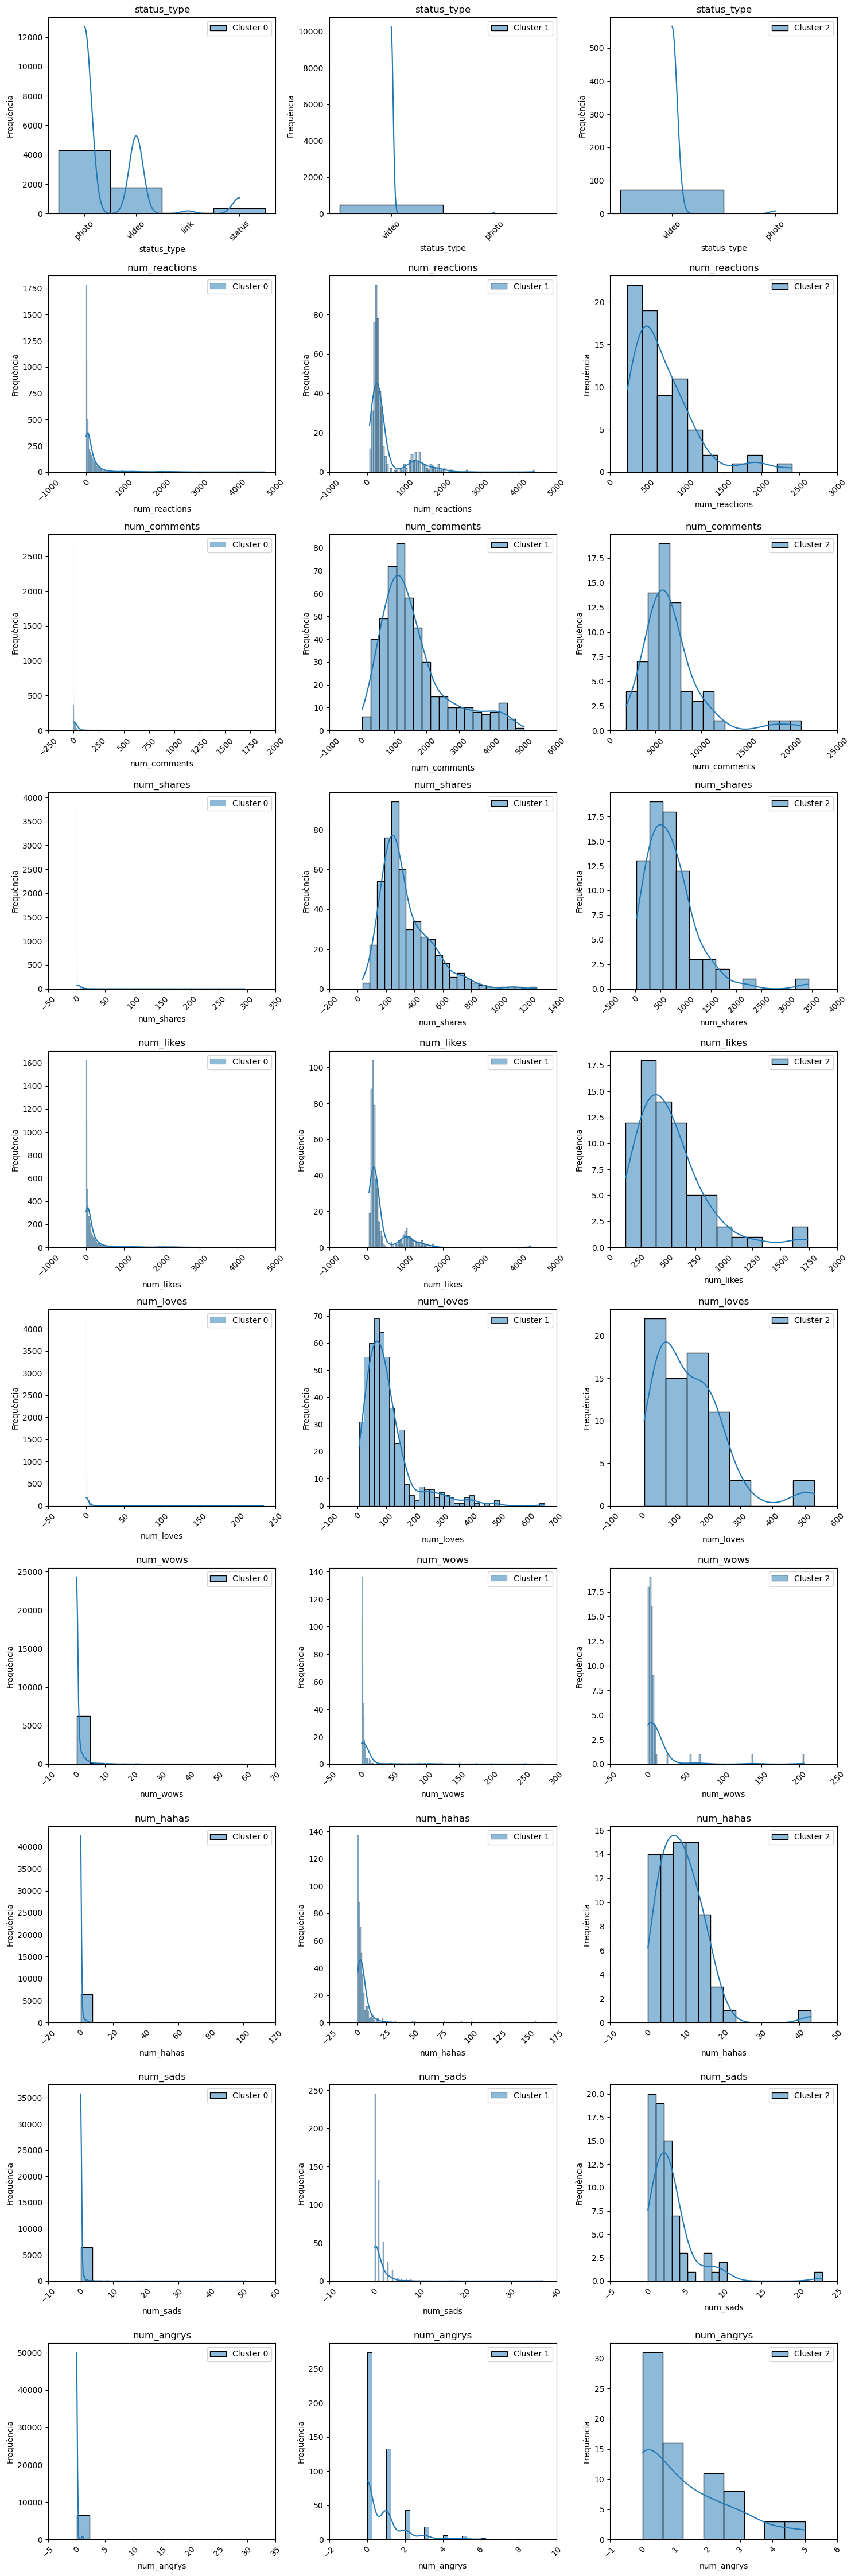

In [36]:
numeric_columns = [col for col in df.columns if col != 'cluster_labels']

fig, axes = plt.subplots(10, 3, figsize=(15, 45))

for i, variable in enumerate(numeric_columns):
    for j, cluster in enumerate(range(0, 3)):
        cluster_data = df[df['cluster_labels'] == cluster]
        sns.histplot(data=cluster_data, x=variable, kde=True, label=f'Cluster {cluster}', ax=axes[i, j])
        
        axes[i, j].set_xlabel(variable)
        axes[i, j].set_ylabel('Frequència')
        axes[i, j].set_title(variable)
        axes[i, j].legend()
        axes[i, j].set_xticks(axes[i, j].get_xticks())
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45)
        
plt.tight_layout()

Si mirem les grafiques:
- Veiem que el cluster 0 té els tres tipus de status_type mentre que els clusters 1 i 2 només tenen dades a 'video' i 'photo'.
- Pel que fa al nombre de reacions, en el cluster la majoria de publicacions tenen menys de 1000 reaccions, en el 2 trobem moltisimes publicacions amb menys de mil i unes quantes entre 1000 i 2000.
- La variable comments, presenta una diferencia força important entre els clusters, mentre que en el cluster 0 la majoria de publicacions  tenen menys de 100 comentaris, en el cluster 1 presenten fins a 5000 comentaris, arribant al cluster 2 que tenim publicacions amb mes de 5000 comentaris i s'arriba a 20.000 comentaris.
- Amb el nombre de shares, el cluster 0 apenes te publicacions amb molts shares, mentre que 1 i el 2 si que n'hi trobem més.
- Pel que fa als likes i les altres variables es segueix el mateix patro que les grafiques anteriors, pocs likes en el cluster 0 i mes en els 1 i 2

Per comprendre la variabilitat i distribució de les dades en els diferents clusters sense tenir en compte les variables dummy, representaré les dades en grafics de caixa i de dispersió:

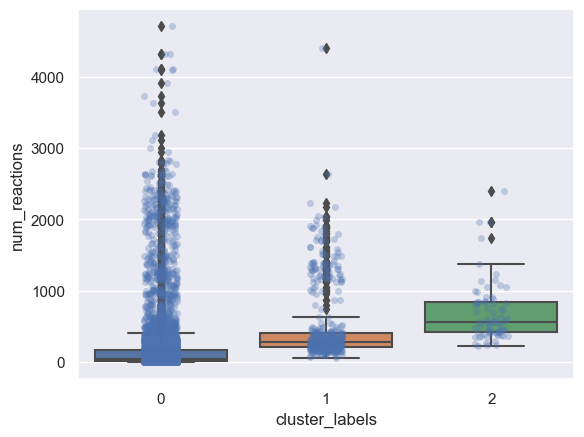

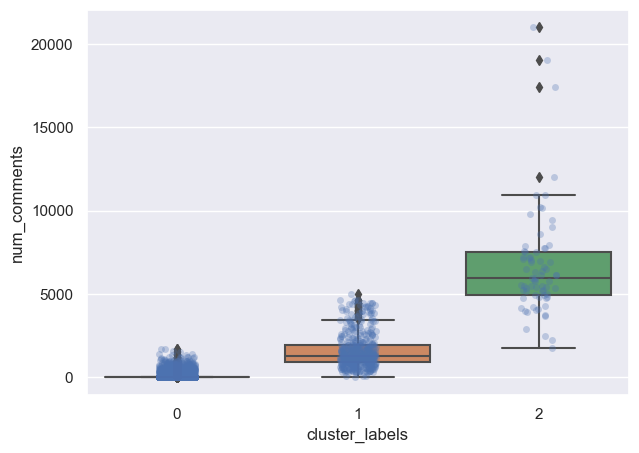

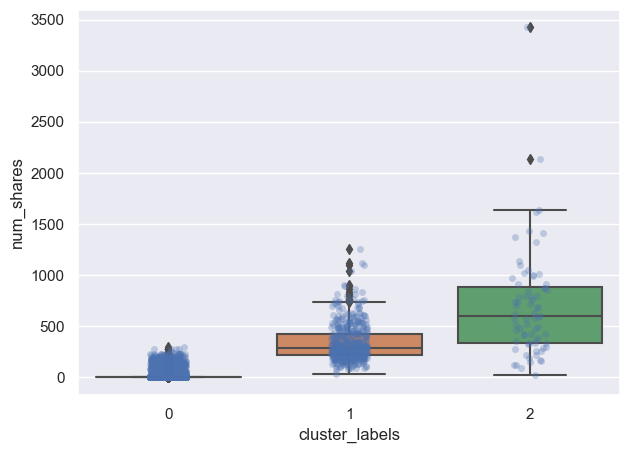

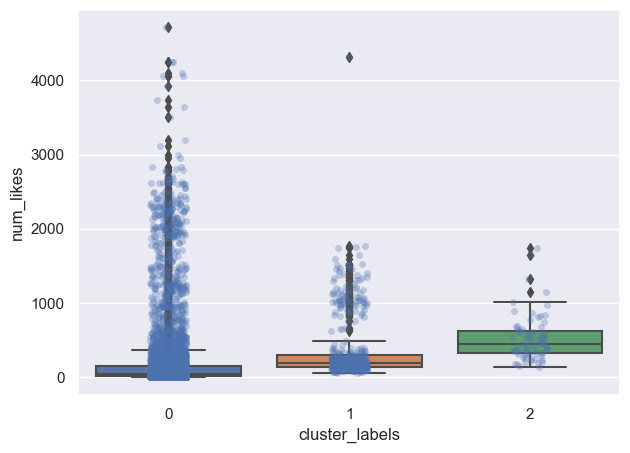

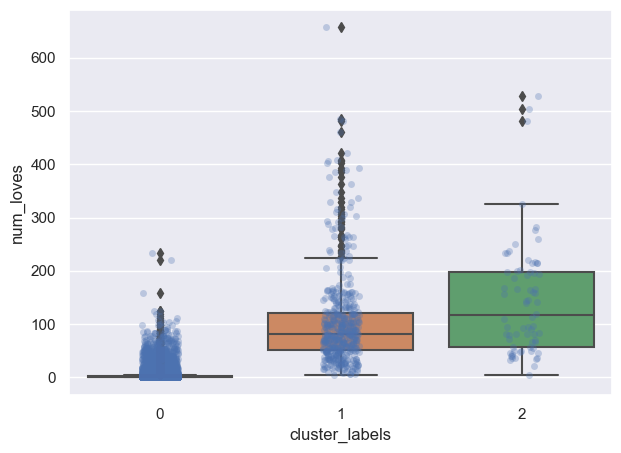

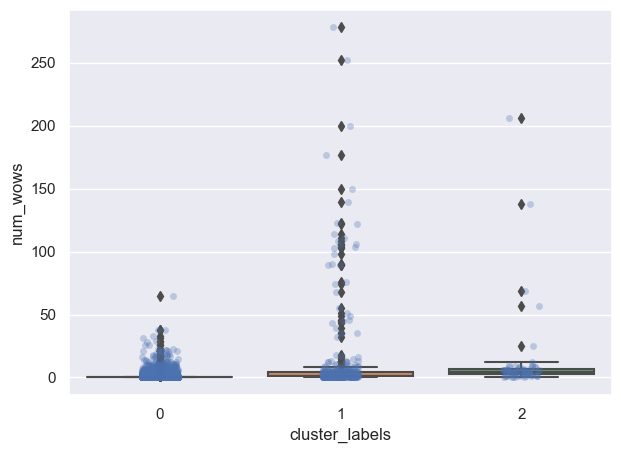

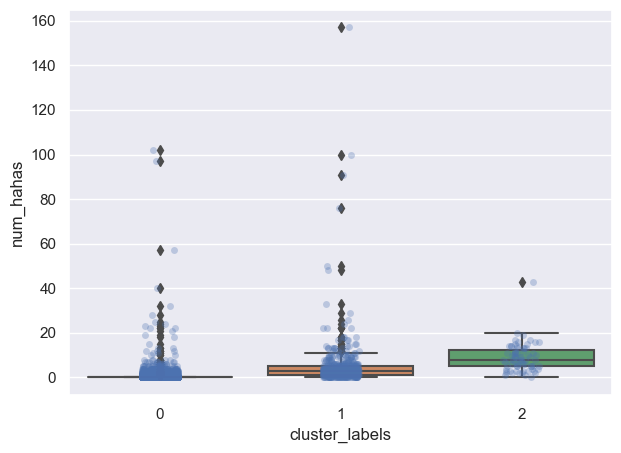

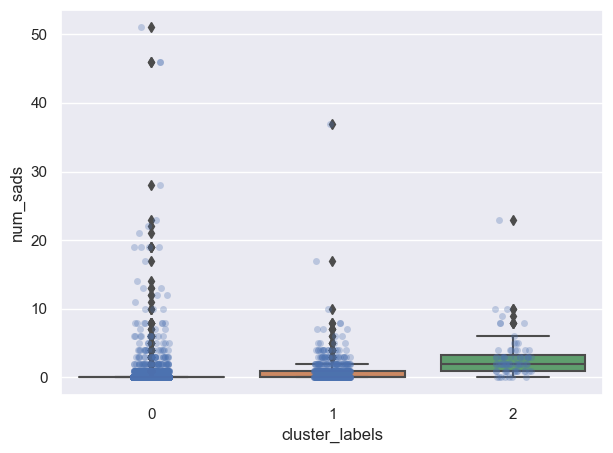

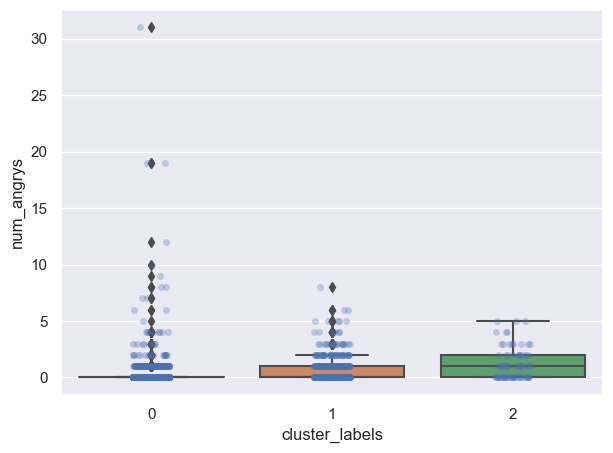

In [37]:
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas','num_sads', 'num_angrys']

for i in cols:
    plt.figure()
    sns.set(rc={"figure.figsize":(7, 5)})
    plt.tight_layout()
    sns.boxplot(x='cluster_labels', y=i, data=df)
    sns.stripplot(x='cluster_labels', y=i, data=df, alpha=0.3)

Cada gràfic es una columna del dataset, cada caixa (una per cluster) ens dona informació de la mediana, quartils i valors atipics. Els punts blaus (grafics de dispersio) mostren la distribucio exacte de les dades.

La caixa del cluster dos sempre es mes gran que les altres, indicant una major dispersió de les dades, tenint en compte que es la mediana. 

## - Exercici 2 (Anàlisis de clúster jeràrquic)
**Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.**

La agrupació jeràrquica és un mètode d'aprenentatge no supervisat per agrupar punts de dades. L'algorisme crea clústers mesurant les diferències entre dades. L'aprenentatge no supervisat vol dir que un model no ha de ser entrenat, i no necessitem una variable "objectiu". Aquest mètode es pot utilitzar en qualsevol dada per visualitzar i interpretar la relació entre punts de dades individuals.

L'algoritme de clustering jeràrquic treballa amb iteracions. A cada iteració, el model calcula la distància d'un punt amb la resta de punts i l'agrupa amb el més proper. Al principi hi han tants clusters com punts, però a cada iteració el nombre de clusters es redueix. El procés acava un cop només hi ha un cluster. Per mostrar gràficaments el procés, utilito un dendograma.

Farem servir Agglomerative Clustering, un tipus de clustering jeràrquic que segueix un enfocament de baix a dalt. Comencem tractant cada punt de dades com el seu propi clúster. A continuació, unim grups que tenen la distància més curta entre ells per crear clústers més grans. Aquest pas es repeteix fins que es forma un clúster gran que conté tots els punts de dades.

La agrupació jeràrquica requereix que decidim tant un mètode de distància com d'enllaç. Utilitzarem la distància euclidiana i el mètode d'enllaç Ward, que intenta minimitzar la variància entre clústers.

Procedeixo a fer un agrupament jerarquic i representar-ho en forma de dendograma:

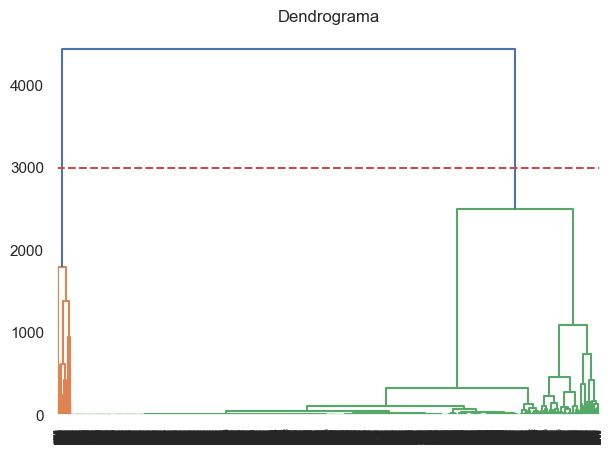

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.title("Dendrograma")
linkage_data = linkage(df_pca, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.axhline(y=3000, color='r', linestyle='--')
plt.show()


L'eix de les x representa els punts, en el nostre dataset n'hi ha 7050, per això es solapen i surt una linia negra obscura.   L'eix de les y representa la distància entre clusters. Sembla ideal dividir les dades en dos clusters. Abans, però m'agradaria mirar com estan distribuides les dades en els dos clusters:

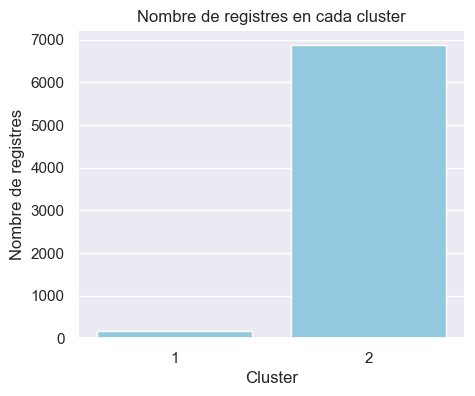

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Obtenir les etiquetes dels clusters utilitzant fcluster
cluster_labels = fcluster(linkage_data, 3000, criterion='distance')

# Creo un DataFrame amb les dades i les etiquetes dels clusters
df_with_clusters = pd.concat([df_pca, pd.DataFrame({'Cluster': cluster_labels})], axis=1)

# Recompte de registres en cada cluster
cluster_counts = df_with_clusters['Cluster'].value_counts().sort_index()

# Gràfic de barres
plt.figure(figsize=(5, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, color='skyblue')
plt.title("Nombre de registres en cada cluster")
plt.xlabel('Cluster')
plt.ylabel("Nombre de registres")
plt.show()

Com es pot veure en el grafic de barres, el nombre de registres és molt més gran en el cluster 2 en comparació amb el 1.

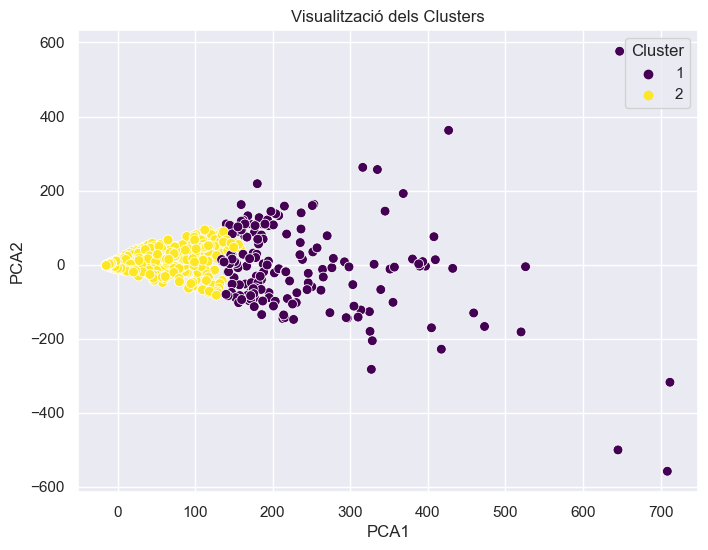

In [40]:
# Procedeixo a fer un scatterplot per visualitzar els registres en els dos clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_with_clusters, palette='viridis', s=50)
plt.title("Visualització dels Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Cluster', loc='upper right')
plt.show()


Com es pot observar en el scatterplot superior, al igual que en el k-means el cluster amb més registres (cluster 2) té les dades més agrupades mentre que el cluster amb menys dades (cluster 1) esta mes dispers.

Faig el coeficient de siluette per mirar quin es el nombre ideal de clusters, tot i que en el dendograma ens indica que el nombre optim de clusters es 2.

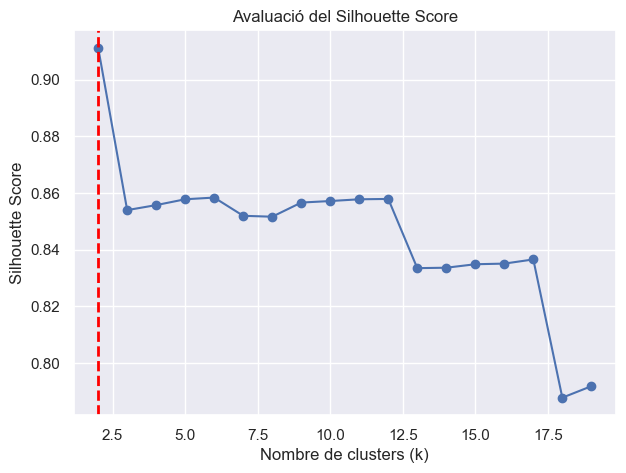

In [41]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Creo una llista per emmagatzemar els valors del coeficient de silhouette
silhouette_scores1 = []

# Creo un loop per provar diferents valors de k (número de clusters)
for k in range(2, 20):
    agglomerative_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative_clustering.fit_predict(df_pca)
    # Calculo el coeficient de silhouette i  l'afegeixo a la llista
    silhouette_avg1 = silhouette_score(df_pca, cluster_labels)
    silhouette_scores1.append(silhouette_avg1)

plt.plot(range(2, 20), silhouette_scores1, marker='o', linestyle='-', color='b')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Avaluació del Silhouette Score')
plt.axvline(x=2, ymin=0, color='red', linewidth=2, ls='--')
plt.show()


Escolleixo dos clusters ja que té el nombre de siluete mes alt.

In [42]:
# Numero optim de clusters basat en el Silhouette Score
optimal_k1 = silhouette_scores1.index(max(silhouette_scores1)) + 2  # Sumar 2 perque el rang comença a 2
print(f"Nombre òptim de clusters: {optimal_k1}")

Nombre òptim de clusters: 2


In [43]:
# Imprimeix el valor de Silhouette Score quan k=2
silhouette_score_k2 = silhouette_scores1[0]  # L'index 0 correspon a k=2
print(f'Silhouette Score per k=2: {silhouette_score_k2}')

Silhouette Score per k=2: 0.911270598455731


El silhouette score no es una dada que ens interesi per si sola, sino en comparació amb totes les altres. Ens interesa agafar el nombre de clusters que te el silhouette score més alt. En el nostre cas, el cluster 2 amb un silhouette score de 0.91.

Ara utilitzaré el model de clustering jerarquic aglomeratiu de scikit-learn (AgglomerativeClustering) per assignar etiquetes de clusters a les nostres dades

In [44]:
from sklearn.cluster import AgglomerativeClustering
# Divideixo les dades en 2 clusters
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [45]:
# Ajusto el model amb el nombre òptim de clusters a les dades df_pca per predir les etiquetes per a cada punt de dades
optimal_cluster_labels = agglo.fit_predict(df_pca)

# Nova columna al dataframe df_pca
df_pca['cluster_pred_agglo'] = optimal_cluster_labels

# Nova columna al dataframe original
df['cluster_pred_agglo'] = optimal_cluster_labels

In [46]:
df.groupby('cluster_pred_agglo')[['num_reactions', 'num_comments', 'num_shares', 
                               'num_likes', 'num_loves', 'num_wows', 
                               'num_hahas', 'num_sads', 'num_angrys']].mean().round(2)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster_pred_agglo,,,,,,,,,
0,216.70,117.75,26.22,205.88,9.24,0.85,0.46,0.18,0.09
1,766.78,4487.48,592.09,581.55,152.33,18.92,10.24,2.59,1.14


La taula superior mostra el valor mitjà de les mètriques (reactions, comments, shares, etc.) per a cada etiqueta de clúster. Cada fila a la taula representa un clúster diferent, i cada columna mostra el valor mitjà de la mètrica corresponent per a aquest clúster.
Com es pot veure el cluster 2 es el que té mes reaccions, mes comentaris, mes shares, més likes, etc. Sembla ser que ha agrupat les dades segons la popularitat de la publicació.

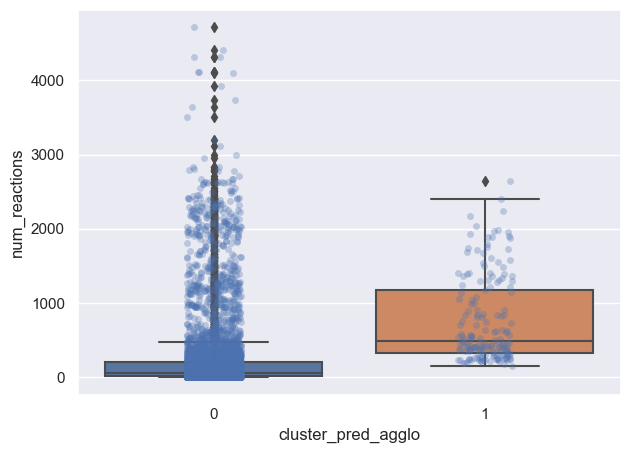

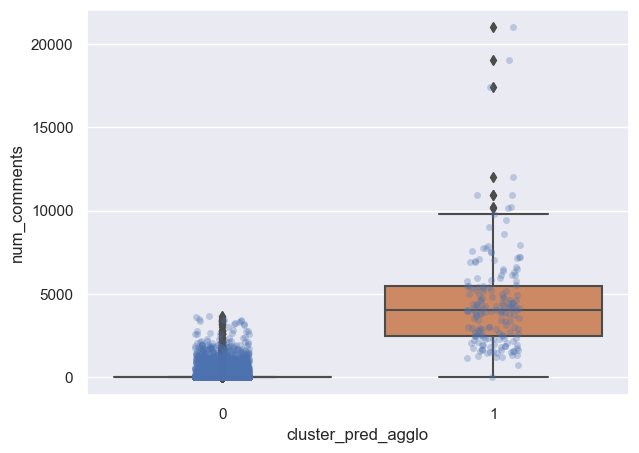

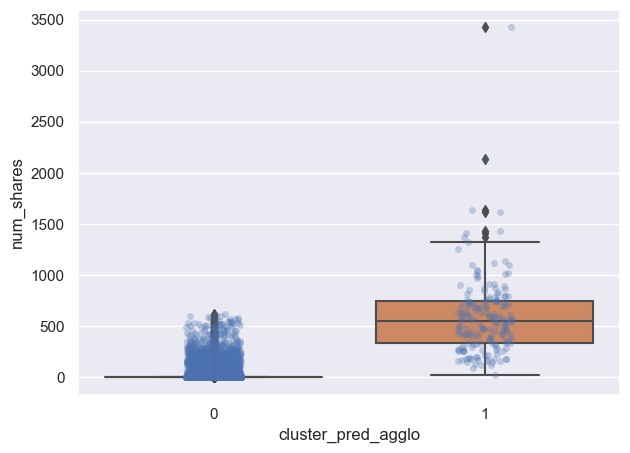

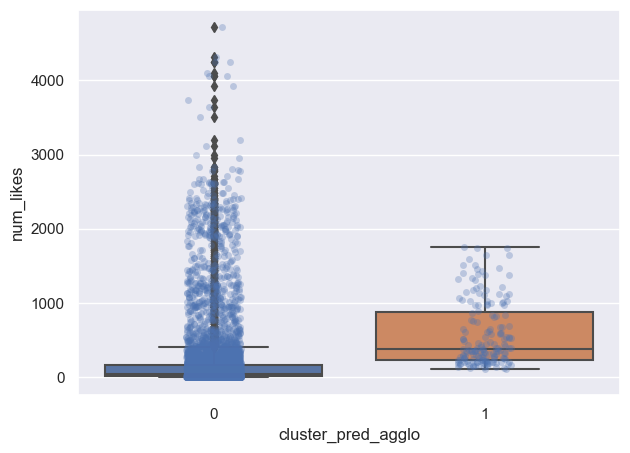

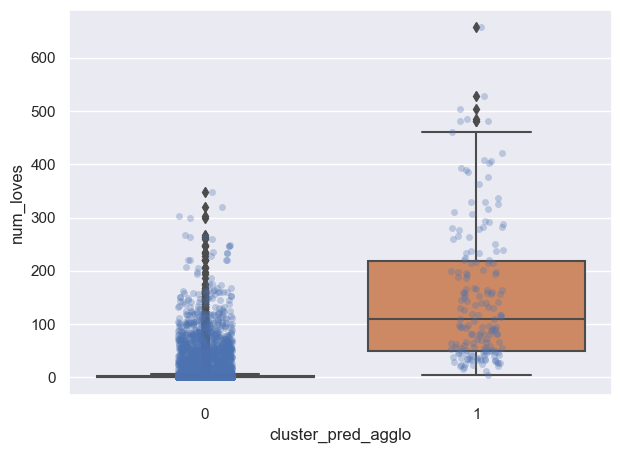

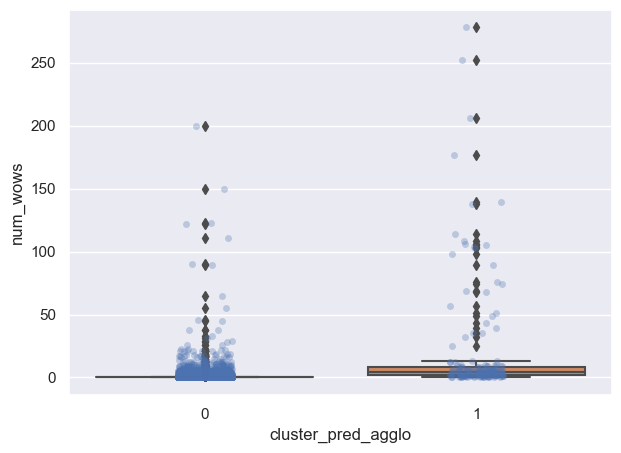

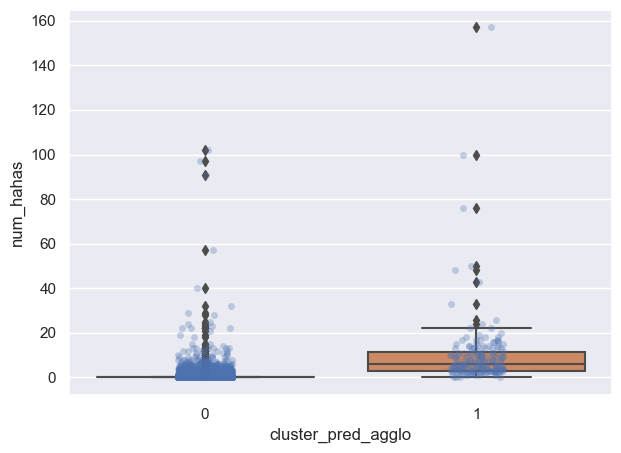

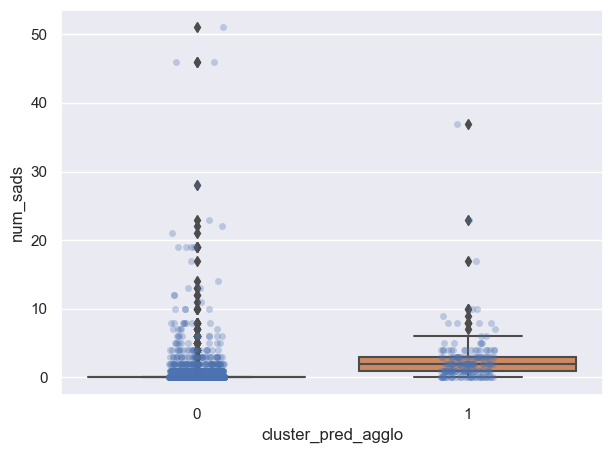

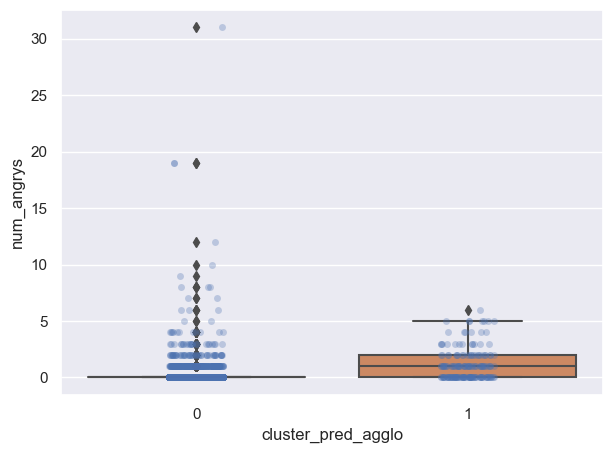

In [47]:
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas','num_sads', 'num_angrys']

for i in cols:
    plt.figure()
    sns.set(rc={"figure.figsize":(7, 5)})
    plt.tight_layout()
    sns.boxplot(x='cluster_pred_agglo', y=i, data=df)
    sns.stripplot(x='cluster_pred_agglo', y=i, data=df, alpha=0.3)

Cada gràfic es una columna del dataset, cada caixa (una per cluster) ens dona informació de la mediana, quartils i valors atipics. Els punts blaus (grafics de dispersio) mostren la distribucio exacte de les dades.

Al igual que en el k-means, la caixa del cluster dos sempre es mes gran que les altres, vol dir que les dades estan més juntes. Mentre que el cluster 1, té els boxplots molt més petits i molts punts blaus de dispersió indicant una major dispersió de les dades.

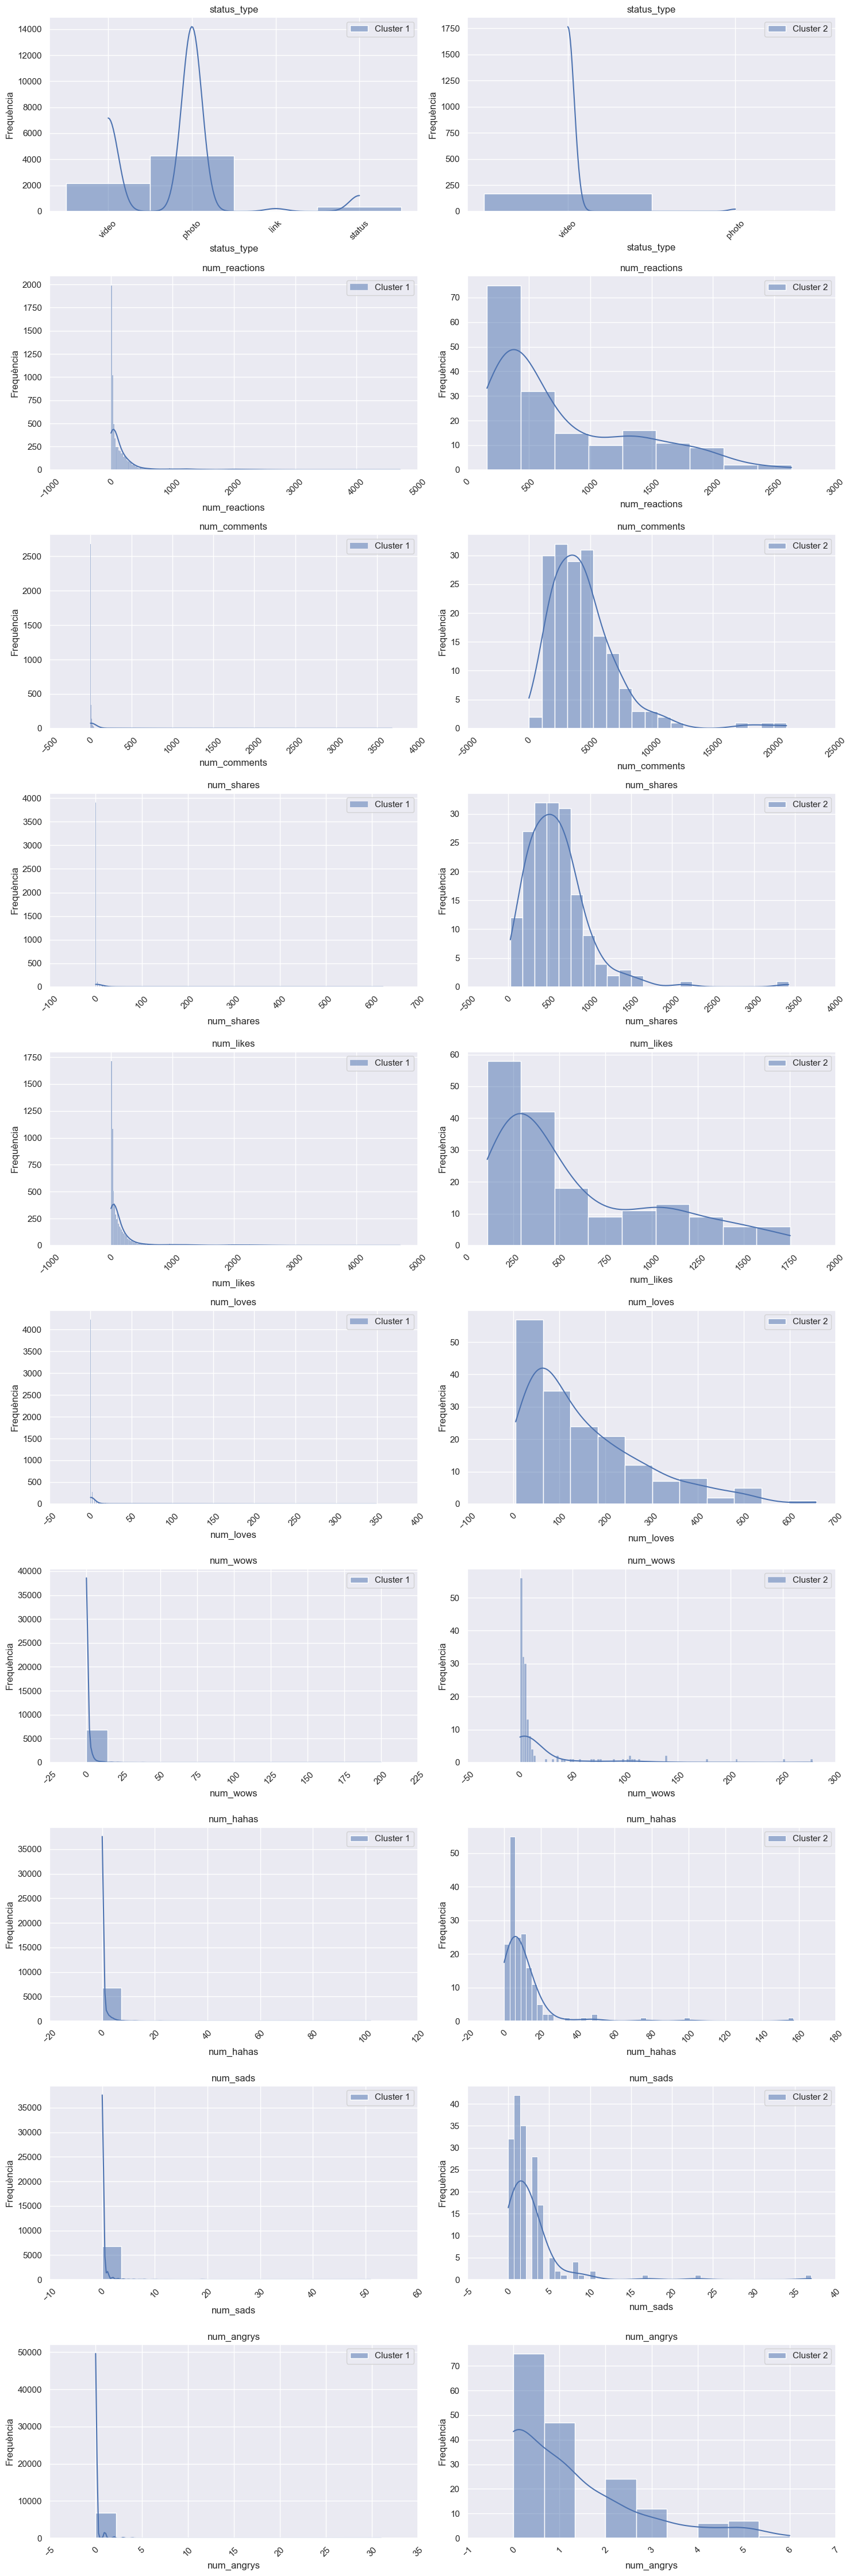

In [48]:
numeric_columns1 = [col for col in df.columns if col not in ['cluster_pred_agglo', 'cluster_labels']]

fig, axes = plt.subplots(10, 2, figsize=(15, 45))

for i, variable in enumerate(numeric_columns1):
    for j, cluster in enumerate(range(0, 2)):
        cluster_data = df[df['cluster_pred_agglo'] == cluster]
        sns.histplot(data=cluster_data, x=variable, kde=True, label=f'Cluster {cluster + 1}', ax=axes[i, j])
        
        axes[i, j].set_xlabel(variable)
        axes[i, j].set_ylabel('Frequència')
        axes[i, j].set_title(variable)
        axes[i, j].legend()
        axes[i, j].set_xticks(axes[i, j].get_xticks())
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45)
        
plt.tight_layout()

Les dues principals diferencies entre els dos clusters, és que en el cluster 2, es troben les publicacions que tenen més shares i més comentaris. En resum, seria que que en el cluster 1 trobem que les publicacions que tenen menys popularitat (menys interaccions), mentre que en el cluster dos agrupa a les publicacions que han tingut molta més popularitat.

## - Exercici 3
**Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.**

Ja he utilitzat el coeficient de Silhouette en els dos exercicis, procedeixo a mostrar els dos resultats:

In [53]:
print(f'Silhouette Score per k=2 en Agglomerative Clustering : {silhouette_score_k2}')

Silhouette Score per k=2 en Agglomerative Clustering : 0.911270598455731


In [56]:
#Aquest seria el nombre optim de clusters segons el silhouette score
print(f'Silhouette Score per k=2 en K-means: {silhouette_score_k}')

Silhouette Score per k=2 en K-means: 0.8743069629484295


In [57]:
# Aquest és el silhouette score per 3 clusters ja que n'he escollit 3 en l'elbow method
silhouette_score_k = silhouette_scores[1]  # L'index 1 correspon a k=2ç3
print(f'Silhouette Score per k=3: {silhouette_score_k}')

Silhouette Score per k=3: 0.8743069629484295


Els dos Silhouette Scores són practicament identics. En el Agglomerative Clustering trobem el valor més alt (0.91). 

El Silhouette score en el k=3 de k-means es inferior, ja que he decidit, utilitzar el elbow method per decidir el nombre de clusters, es per aixo que el valor es mes baix, ja que no es el nombre optim segons el silhoutte score. Tot i així, ambdós models tant el k-means i Agglomerative Clustering han presentat resultats similars i classificacions similars. 